Dataset: https://archive.ics.uci.edu/dataset/320/student+performance

In [40]:
# import and load dataset

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 

# variable information 
# print(student_performance.variables) 


In [41]:
#Understand how the dataset appears, and the number of feature and target variables

import numpy as np

num_features = X.shape[1]
print("Number of feature variables:", num_features)

num_targets = y.shape[1]
print("Number of target variables:", num_targets)

import pandas as pd

# showcase all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

X[0:10]


Number of feature variables: 30
Number of target variables: 3


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0


In [42]:
#Showcase students that pass and failed

print("Number of students:",len(X))

failed_G3 = (y['G3'] <= 9).sum()
print("Number of students who failed:", failed_G3)

passed_G3 = (y['G3'] >= 10).sum()
print("Number of students who passed:", passed_G3)

Number of students: 649
Number of students who failed: 100
Number of students who passed: 549


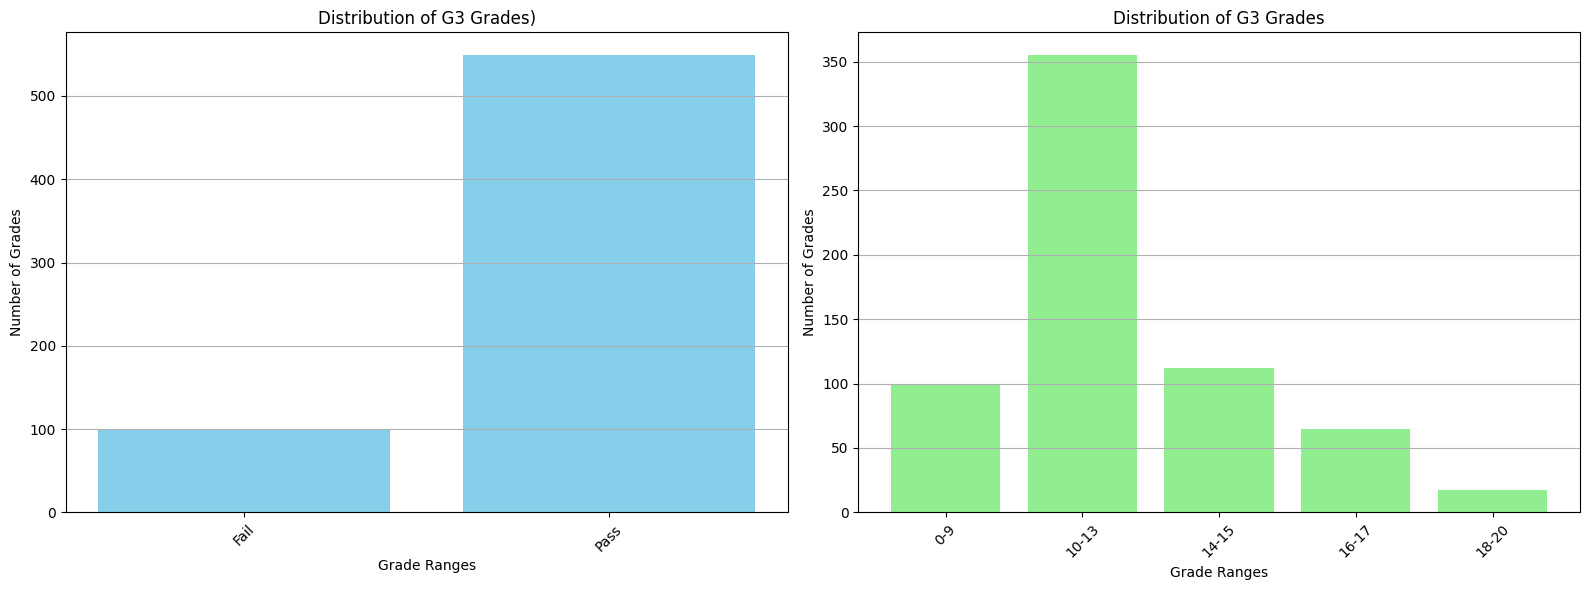

In [43]:
# Showcase which students passed and failed, and distribution of grades

import numpy as np
import matplotlib.pyplot as plt

# Define the grade ranges for the 1st plot
grade_ranges_original = [(0, 9), (10, 20)]

# Count the number of grades falling within each range for the 1st plot
grade_counts_original = [((y['G3'] >= low) & (y['G3'] <= high)).sum() for low, high in grade_ranges_original]

# Define the grade ranges for the 2nd plot
grade_ranges_additional = [(0, 9), (10, 13), (14, 15), (16, 17), (18, 20)]

# Count the number of grades falling within each range for the 2nd plot
grade_counts_additional = [((y['G3'] >= low) & (y['G3'] <= high)).sum() for low, high in grade_ranges_additional]

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.bar(np.arange(len(grade_ranges_original)), grade_counts_original, tick_label=['Fail', 'Pass'], color='skyblue')
plt.xlabel('Grade Ranges')
plt.ylabel('Number of Grades')
plt.title('Distribution of G3 Grades)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
plt.bar(np.arange(len(grade_ranges_additional)), grade_counts_additional, tick_label=['0-9', '10-13', '14-15', '16-17', '18-20'], color='lightgreen')
plt.xlabel('Grade Ranges')
plt.ylabel('Number of Grades')
plt.title('Distribution of G3 Grades')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [44]:
# Perform logistic regression to determine if student passes or fails

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Encode pass (1) and fail (0) based on G3 grades
y_binary = (y['G3'] >= 10).astype(int)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)
X_encoded = ct.fit_transform(X)

# Get feature names after one-hot encoding
encoded_feature_names = ct.get_feature_names_out()

# Create a DataFrame with the one-hot encoded features and set custom column names
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Concatenate feature variables with G1 and G2 to help predict G3
X_with_grades = pd.concat([X_encoded_df, y[['G1', 'G2']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_with_grades, y_binary, test_size=0.2, random_state=14)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9153846153846154
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.94      0.95      0.95       105

    accuracy                           0.92       130
   macro avg       0.87      0.86      0.86       130
weighted avg       0.91      0.92      0.91       130



In [45]:
# Find the rows in y that have a 0 in any element
rows_with_zero = y[(y == 0).any(axis=1)]

rows_with_zero


,G1,G2,G3
0,0,11,11
163,11,9,0
440,7,0,0
519,8,7,0
563,7,0,0
567,4,0,0
583,8,6,0
586,8,8,0
597,9,0,0
603,5,0,0


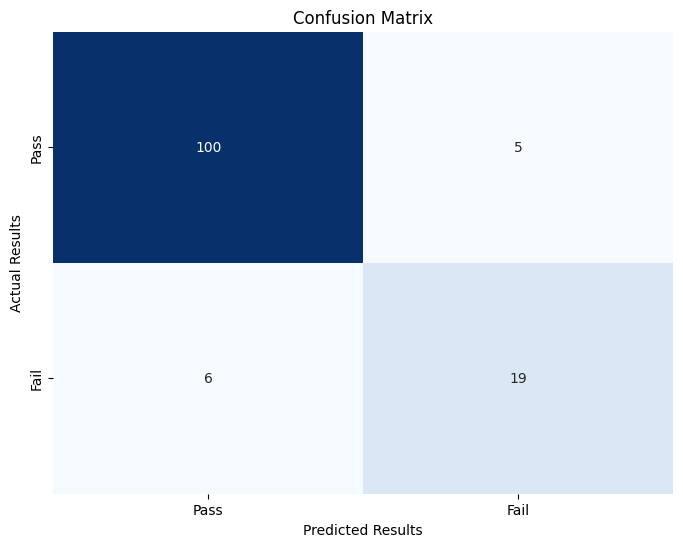

In [46]:
# Create confusion matrix to showcase which students passed and failed

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with "Pass" as True Positive on top left and "Fail" as True Negative on bottom right
plt.figure(figsize=(8, 6))
sns.heatmap(cm[::-1, ::-1], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Results')
plt.ylabel('Actual Results')
plt.xticks(ticks=[0.5, 1.5], labels=['Pass', 'Fail'])
plt.yticks(ticks=[0.5, 1.5], labels=['Pass', 'Fail'])
plt.show()


Mean Squared Error: 0.6776991639052931
R^2 Score: 0.936384301639675


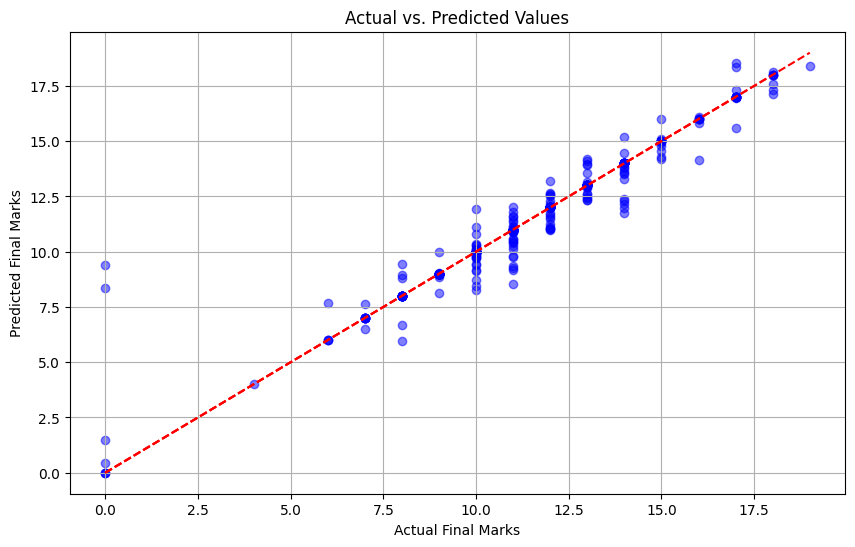

In [47]:
# Linear regression using G1 and G2 to predict G3

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)
X_encoded = ct.fit_transform(X)

# Merge encoded features with G1 and G2 from y
X_encoded = np.concatenate([X_encoded, y[['G1', 'G2']].values], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=8)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Final Marks')
plt.ylabel('Predicted Final Marks')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


Mean Squared Error: 6.980092438963116
R^2 Score: 0.2045348751638961


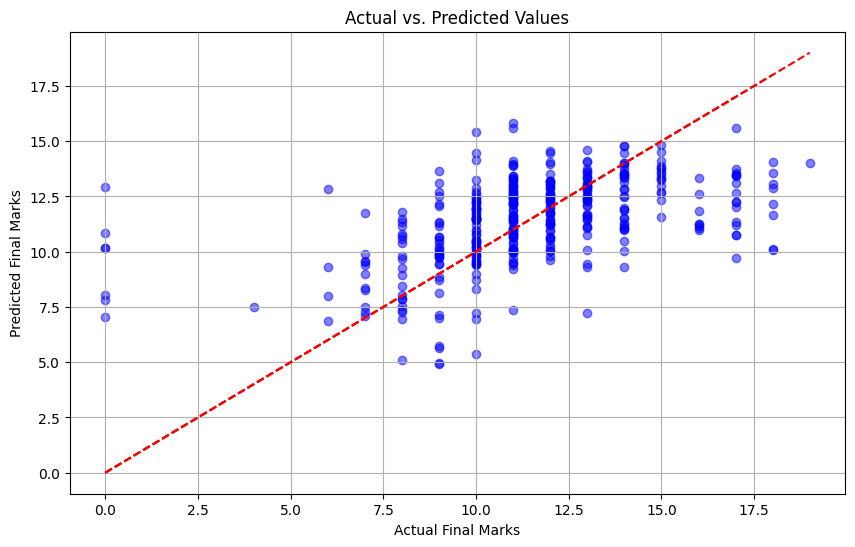

In [48]:
# Linear regression without using G1 or G2 to predict G3

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)
X_encoded = ct.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=8)

# Initialize and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Final Marks')
plt.ylabel('Predicted Final Marks')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

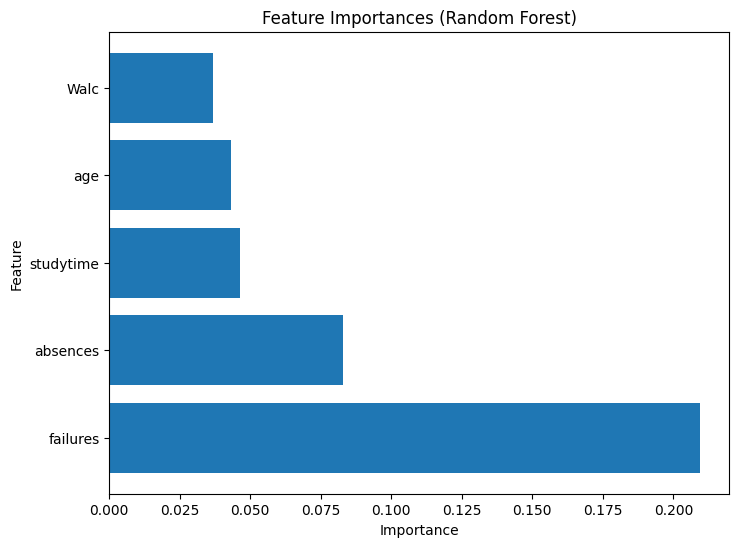

In [49]:
# Perform Random Forest but without G1 and G2

from sklearn.ensemble import RandomForestRegressor
import numpy as np

X_encoded_df = X_with_grades.drop(['G1', 'G2'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y['G3'], test_size=0.2, random_state = 12)

# Initialize and train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state = 12)
rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf.feature_importances_

# Get feature names
categorical_feature_names = ct.named_transformers_['encoder'].get_feature_names_out(input_features=categorical_cols)
feature_names = np.concatenate([categorical_feature_names, X.select_dtypes(include=['int']).columns])

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'].head(5), feature_importance_df['Importance'].head(5))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.show()

In [50]:
# print the total features variables and their sum of importance, excluding G1 and G2

total_importance = np.sum(feature_importances)

# Get the number of variables used
num_variables = len(feature_importances)

print("Total sum of feature importances:", total_importance)
print("Number of variables:", num_variables)
feature_importance_df.head(10)

Total sum of feature importances: 1.0
Number of variables: 56


,Feature,Importance
48,failures,0.209315
55,absences,0.082892
47,studytime,0.046464
43,age,0.043083
53,Walc,0.036772
45,Fedu,0.035602
54,health,0.035534
51,goout,0.035350
50,freetime,0.034794
49,famrel,0.029191


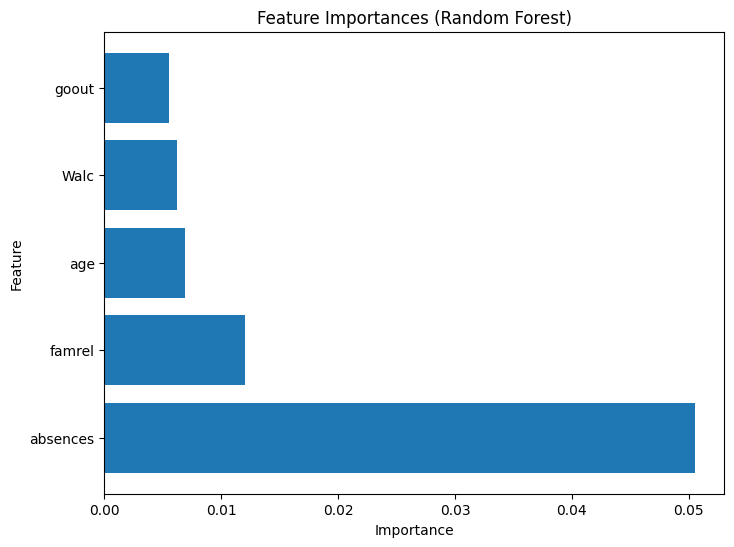

In [51]:
# Perform Random Forest with G1 and G2 as influence variables, but not included in feature importance

from sklearn.ensemble import RandomForestRegressor
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_with_grades, y['G3'], test_size=0.2, random_state = 12)

# Initialize and train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state = 12)
rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf.feature_importances_

# Get feature names
categorical_feature_names = ct.named_transformers_['encoder'].get_feature_names_out(input_features=categorical_cols)
feature_names = np.concatenate([categorical_feature_names, X.select_dtypes(include=['int']).columns])

feature_importances = feature_importances[:-2]

# store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'].head(5), feature_importance_df['Importance'].head(5))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.show()

In [52]:
# print the total features variables and their sum of importance, excluding G1 and G2

total_importance = np.sum(feature_importances)

num_variables = len(feature_importances)

print("Total sum of feature importances:", total_importance)
print("Number of variables:", num_variables)
feature_importance_df.head(10)

Total sum of feature importances: 0.1514180066334973
Number of variables: 56


,Feature,Importance
55,absences,0.050521
49,famrel,0.012012
43,age,0.006859
53,Walc,0.006221
51,goout,0.005558
44,Medu,0.004618
48,failures,0.004585
14,Mjob_teacher,0.004022
54,health,0.003934
6,famsize_GT3,0.003798
